     |████████████████████████████████| 112kB 4.9MB/s 
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')
       longitude  latitude  ...  households  median_income
0        -122.23     37.88  ...       126.0         8.3252
1        -122.22     37.86  ...      1138.0         8.3014
2        -122.24     37.85  ...       177.0         7.2574
3        -122.25     37.85  ...       219.0         5.6431
4        -122.25     37.85  ...       259.0         3.8462
...          ...       ...  ...         ...            ...
20635    -121.09     39.48  ...       330.0         1.5603
20636    -121.21     39.49  ...       114.0         2.5568
20637    -121.22     39.43  ...       433.0         1.7000
20638    -121.32     39.43  ...       349.0         1.8672
20639    -121.24     39.37  ...       530.0         2.3886

[20433 rows x 8 columns]


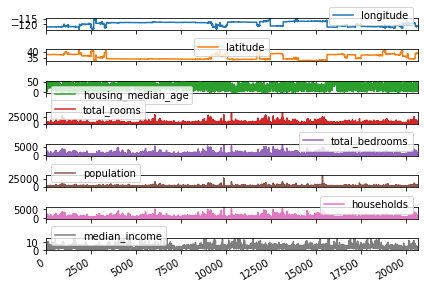

Epoch 1
	Loss = 86418.4664728139
	R^2 Score = -1.1265134138905812
Epoch 2
	Loss = 52730.9520389574
	R^2 Score = 0.5563087466023342
Epoch 3
	Loss = 49630.19981432175
	R^2 Score = 0.580277622831085
Epoch 4
	Loss = 47889.07545368554
	R^2 Score = 0.6223374600634768
Epoch 5
	Loss = 46882.6267341648
	R^2 Score = 0.6494676116767358
Epoch 6
	Loss = 46540.05712233744
	R^2 Score = 0.6377442454561874
Epoch 7
	Loss = 45477.74988614069
	R^2 Score = 0.6643188597843551
Epoch 8
	Loss = 44539.423819366595
	R^2 Score = 0.6766222361108263
Epoch 9
	Loss = 44415.86320242433
	R^2 Score = 0.6911384426564284
Epoch 10
	Loss = 44393.94871952074
	R^2 Score = 0.6824192589319097
Epoch 11
	Loss = 43745.30477508408
	R^2 Score = 0.6888337555141337
Epoch 12
	Loss = 43589.209641255606
	R^2 Score = 0.6926271705552072
Epoch 13
	Loss = 43710.28207329036
	R^2 Score = 0.6862599268495011
Epoch 14
	Loss = 43179.79564882287
	R^2 Score = 0.714604174256285
Epoch 15
	Loss = 42839.29832889574
	R^2 Score = 0.7067877057551064
Epoch 

In [0]:
#immporting library
import pandas as pd

from sklearn.model_selection import train_test_split

import numpy as np

import numpy.random

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import torch

from torch.nn import Conv1d

from torch.nn import MaxPool1d

from torch.nn import Flatten

from torch.nn import Linear

from torch.nn.functional import relu

from torch.utils.data import DataLoader, TensorDataset

import time

from torch.optim import Adam

from torch.nn import L1Loss

!pip install pytorch-ignite
from ignite.contrib.metrics.regression.r2_score import R2Score


#reads comma-seperated data (csv file)
dataset = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')
#remove any incompletion part
dataset =dataset.dropna()

#view the first five rows of the dataset
dataset.head(10)
ds1=dataset
ds1.head(17)


#split the datset to train-test

#we will predict the median_house_value column
Y=dataset['median_house_value']

#select from longitude to median_income column
X=dataset.loc[:,'longitude' : 'median_income']


#extract the datapoints for X Axis and Y axis
print(X.columns)
X1=X[:]
print(X1)
housing_def=pd.DataFrame(X1,columns= X1.columns)

#Draw subplots for eaxh x:y
housing_def.plot(subplots=True)
plt.tight_layout()
plt.show()


#Scaling the dataset to normalise and for even data distribution
scale=MinMaxScaler()

#split the dataset into Train test split (70:30)
#70 percent training 
#30 percent testing 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2003)

#Scaling the training and testing data respected to X
x_train_np =scale.fit_transform(x_train) 
x_test_np =scale.fit_transform(x_test) 

#Y converted to array using to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()



#defining the model class 
class _1106925_1D_regg(torch.nn.Module):

  def __init__(self, batch_size, inputs, outputs):

    super(_1106925_1D_regg, self).__init__()
    self.batch_size = batch_size
    self.inputs = inputs
    self.outputs = outputs

    #arguements for taking inputs using function 
    self.input_layer = Conv1d(inputs, batch_size, 1)

    #Maxpooling for dimension reduction and extraction of max feature from each stride
    self.max_pooling_layer = MaxPool1d(1)

    #Two Convolution network created with input,batch_size and kernel=1
    self.conv_layer = Conv1d(batch_size, 128, 1)
    self.conv_layer1 = Conv1d(128, 128, 1)
    

    #Flattening to get the vector form of the matrix
    self.flatten_layer = Flatten()

    #apllying linear transformation 
    self.linear_layer = Linear(128, 64)

    #The output layer with 64 batch size and ouput value 
    self.output_layer = Linear(64, outputs)

#function to feed the values to the model
  def feed(self, input):

    input = input.reshape((self.batch_size,self.inputs, 1))

    output = relu(self.input_layer(input))

    output = self.max_pooling_layer(output)

    #Apllying relu activation function for overcoming overfitting problem 
    output = relu(self.conv_layer(output))
    output = relu(self.conv_layer1(output))

    output = self.flatten_layer(output)

    output = self.linear_layer(output)

    output = self.output_layer(output)

    return output




#initializing the batch size 
batch_size = 64

model = _1106925_1D_regg(batch_size, X.shape[1],1)

model.cuda()



#defining the avg_loss and avg_r2 score using function
#pass by value function
def model_loss(model, dataset, train = False , optimizer = None):

    perfomance = L1Loss()
    score_metric = R2Score()

    avg_loss = 0
    avg_score = 0
    count = 0

    for input, output in iter(dataset):

      predictions = model.feed(input)
    

      loss= perfomance(predictions, output)
      score_metric.update([predictions,output])
      score = score_metric.compute()

      if(train):

        #remove the gradient values wrt parameters
        optimizer.zero_grad()

        #recovering the gradient values wrt paraameters that are trainable 
        loss.backward()

        optimizer.step()

      #store the loss, count and r2 score in variables
      avg_loss += loss.item()
      avg_score += score 
      count += 1

    

    return avg_loss / count, avg_score / count



#initializing the number of epochs
epochs = 300

#using the ADAM optimizer function with lr=1e-2
optimizer = Adam(model.parameters(), lr=1e-2)


inputs = torch.from_numpy(x_train_np).cuda().float()
outputs = torch.from_numpy(y_train_np.reshape(y_train_np.shape[0],1)).cuda().float()

tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size, shuffle=True, drop_last=True)

for epoch in range(epochs):
  avg_loss, avg_r2_score = model_loss(model, loader, train = True, optimizer=optimizer)

  print("Epoch " + str(epoch + 1) + "\n\tLoss = " + str(avg_loss) + "\n\tR^2 Score = " + str(avg_r2_score))




imputs=torch.from_numpy(x_test_np).cuda().float()
ouputs=torch.from_numpy(y_test_np.reshape(y_test_np.shape[0],1)).cuda().float()

#computing the inference time in seconds
tensor=TensorDataset(inputs,outputs)
t0 = time.clock()


#load the data values in the model
loader=DataLoader(tensor,batch_size,shuffle=True,drop_last=True)
print (time.clock(), "seconds process time")
t0 = time.clock()

#retrieve the average loss and r2 score from the epoch operation and model loss function
avg_loss, avg_r2_score=model_loss(model,loader)
print (time.clock(), "seconds process time")

print("The model loss is : " + str(avg_loss))
print("The average r2 score is: " + str(avg_r2_score))

